In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Load dataset
data = pd.read_csv('kmeans - kmeans_blobs.csv').values

# Normalize the data
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

In [20]:
#calculate euclidean distance
def ed(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))

def initialize_centroids(data, k):
    return data[:k]

In [21]:
#assigning clusters
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [ed(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)
    return clusters

In [22]:
#computing centriods
def compute_centroids(clusters):
    centroids = []
    for cluster in clusters:
        if cluster:
            centroids.append(np.mean(cluster, axis=0).tolist())
        else:
            centroids.append(cluster[0])
    return centroids


In [23]:
#implementing k-means
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        cluster = assign_clusters(data, centroids)
        new_centroids = compute_centroids(cluster)
        if np.all(np.array(new_centroids) == np.array(centroids)):
            break
        centroids = new_centroids
    return centroids, cluster

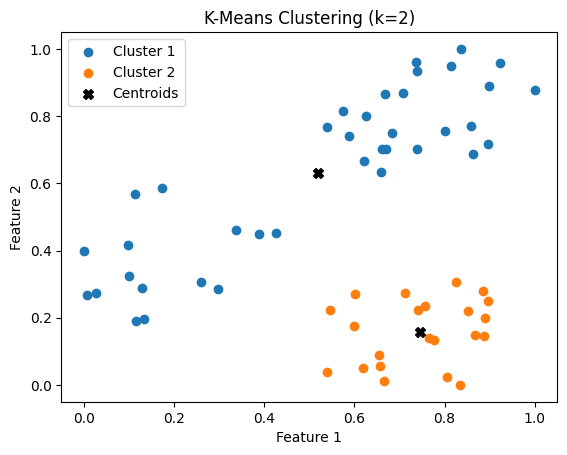

In [24]:
def plot_clusters(data, centroids, clusters, k):
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=50, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'K-Means Clustering (k={k})')
    plt.show()
# Run and plot for k=2
centroids_2, clusters_2 = kmeans(data, 2)
plot_clusters(data, centroids_2, clusters_2, 2)



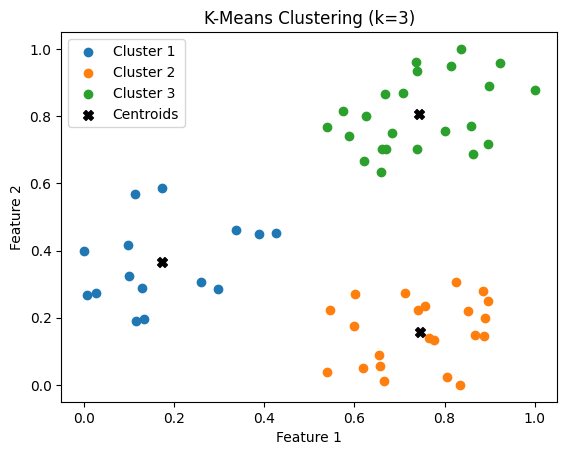

In [25]:
# Run and plot for k=3
centroids_3, clusters_3 = kmeans(data, 3)
plot_clusters(data, centroids_3, clusters_3, 3)